Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats as sc
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
import seaborn as sns

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
cd /data

/data


In [3]:
data_ana = pd.read_pickle('/data/ana_am_nonasso_2Hz')
data_ana

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
147,"{'raw_amp2': [5.87638192736e-11, 8.40813966296...","{'raw_amp2': [6.95816376739e-11, 3.58255271419...",2017112801,20,"[1, 36]",[]
148,"{'raw_amp2': [6.63497990868e-11, 1.10799824762...","{'raw_amp2': [1.52285984788e-10, nan, 1.075511...",2017112901,25,"[30, 31, 32, 33]","[30, 31, 34, 37, 39, 42, 44, 46, 51]"
150,"{'raw_amp2': [nan, 3.48480423953e-11, nan, 3.9...","{'raw_amp2': [nan, nan, nan, 5.34525585462e-11...",2017120701,15,[2],[]
151,"{'raw_amp2': [3.34801128959e-11, 2.11822163644...","{'raw_amp2': [2.11167215272e-11, 4.16885973155...",2017120702,30,"[12, 25]","[49, 51]"
152,"{'raw_amp2': [6.36397728903e-11, 2.63551770926...","{'raw_amp2': [1.44989681603e-10, 1.38946470181...",2017121101,33,"[1, 3, 4, 5, 9, 10, 11, 30, 33, 36, 37]","[63, 65]"
153,"{'raw_amp2': [1.05617196069e-11, 1.25015015508...","{'raw_amp2': [2.13321014443e-10, 3.03203508613...",2017121102,15,"[1, 17, 18, 29, 32]",[]


In [4]:
amp_bef = []
amp_aft = []
onset_tau_bef = []
onset_tau_aft = []
decay_tau_bef = []
decay_tau_aft = []
freq_bef_fast = []
freq_aft_fast = []
freq_bef_slow = []
freq_aft_slow = []
data_index = list(data_ana.index)
for i in range(len(data_ana)):
    target = data_index[i]
    psc_naspm_bef = pd.read_pickle('/data/psc_nonasso_2Hz_AM_slope2_thres2.5_before_'+str(target))
    psc_naspm_aft = pd.read_pickle('/data/psc_nonasso_2Hz_AM_slope2_thres2.5_after_'+str(target))
    para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)
    amp_bef.append(para_bef['amp'][-500:])
    amp_aft.append(para_aft['amp'][-500:])
    onset_tau_bef.append(para_bef['onset_tau'][-500:])
    onset_tau_aft.append(para_aft['onset_tau'][-500:])
    decay_tau_bef.append(para_bef['decay_tau'][-500:])
    decay_tau_aft.append(para_aft['decay_tau'][-500:])
    #freq_bef.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005]))
    #freq_aft.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005]))
    para_bef['decay_tau'] = para_bef['decay_tau'][-500:]
    para_aft['decay_tau'] = para_aft['decay_tau'][-500:]
    freq_bef_fast.append(len(para_bef['decay_tau'][para_bef['decay_tau']<0.0005]))
    freq_aft_fast.append(len(para_aft['decay_tau'][para_aft['decay_tau']<0.0005]))
    freq_bef_slow.append(len(para_bef['decay_tau'][para_bef['decay_tau']>0.0005]))
    freq_aft_slow.append(len(para_aft['decay_tau'][para_aft['decay_tau']>0.0005]))
amp_bef = np.hstack(amp_bef)
amp_aft = np.hstack(amp_aft)
onset_tau_bef = np.hstack(onset_tau_bef)
onset_tau_aft = np.hstack(onset_tau_aft)
decay_tau_bef = np.hstack(decay_tau_bef)
decay_tau_aft = np.hstack(decay_tau_aft)

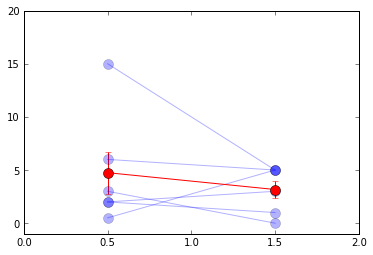

In [9]:
freq_bef_mean = np.mean(freq_bef_fast)
freq_bef_ste = np.std(freq_bef_fast)/np.sqrt(len(freq_bef_fast))
freq_aft_mean = np.mean(freq_aft_fast)
freq_aft_ste = np.std(freq_aft_fast)/np.sqrt(len(freq_aft_fast))

for i, j in zip(freq_bef_fast, freq_aft_fast):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([-1,20])

with PdfPages('/data/mini_freq_post_AM.pdf') as pdf:
    pdf.savefig()

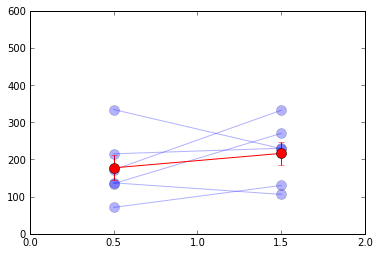

In [8]:
freq_bef_mean = np.mean(freq_bef_slow)
freq_bef_ste = np.std(freq_bef_slow)/np.sqrt(len(freq_bef_slow))
freq_aft_mean = np.mean(freq_aft_slow)
freq_aft_ste = np.std(freq_aft_slow)/np.sqrt(len(freq_aft_slow))

for i, j in zip(freq_bef_slow, freq_aft_slow):
    plt.plot([0.5,1.5], [i,j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [freq_bef_mean, freq_aft_mean], [freq_bef_ste, freq_aft_ste], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,600])

with PdfPages('/data/mini_freq_post_AM.pdf') as pdf:
    pdf.savefig()

In [13]:
sc.ttest_rel(freq_bef, freq_aft)

Ttest_relResult(statistic=0.44895786190582632, pvalue=0.6722516942693233)

(0, 4e-10)

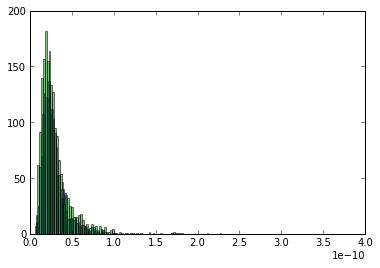

In [14]:
plt.hist(amp_bef, bins=100, alpha=0.5)
plt.hist(amp_aft, bins=100, alpha=0.5)
plt.xlim([0, 4e-10])

RanksumsResult(statistic=0.87389664768402486, pvalue=0.38217454049800614)


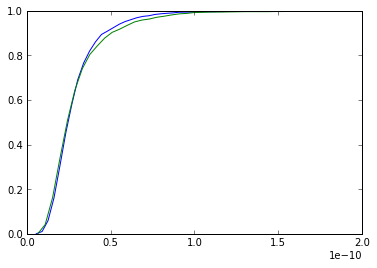

In [15]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(amp_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(amp_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
#plt.xlim([0,1e-10])
print(sc.ranksums(amp_bef, amp_aft))

with PdfPages('/data/anti_hebbian_mini_amp.pdf') as pdf:
    pdf.savefig()

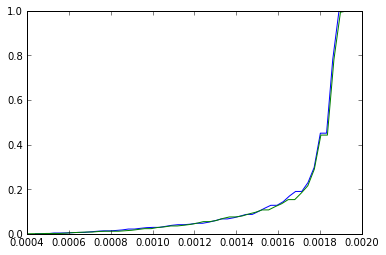

In [16]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(onset_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(onset_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
sc.ranksums(onset_tau_bef, onset_tau_aft)

with PdfPages('/data/anti_hebbian_mini_onset_tau.pdf') as pdf:
    pdf.savefig()

(array([    4.,     6.,    15.,     8.,    22.,    21.,    17.,    18.,
           34.,    38.,    45.,    71.,    64.,    44.,    96.,   149.,
          237.,   974.,  1716.,    13.]),
 array([ 0.00048 ,  0.000554,  0.000628,  0.000702,  0.000776,  0.00085 ,
         0.000924,  0.000998,  0.001072,  0.001146,  0.00122 ,  0.001294,
         0.001368,  0.001442,  0.001516,  0.00159 ,  0.001664,  0.001738,
         0.001812,  0.001886,  0.00196 ]),
 <a list of 20 Patch objects>)

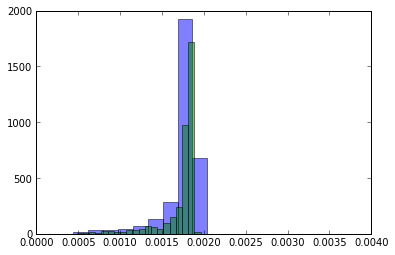

In [45]:
plt.hist(onset_tau_bef, alpha=0.5, bins=20)
plt.hist(onset_tau_aft, alpha=0.5, bins=20)

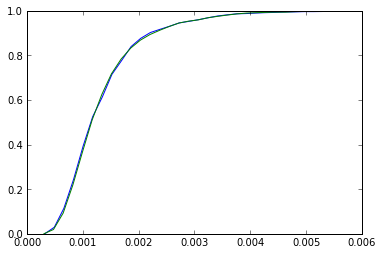

In [17]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(decay_tau_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(decay_tau_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)
plt.xlim([0,0.006])

with PdfPages('/data/anti_hebbian_mini_decay_tau.pdf') as pdf:
    pdf.savefig()

In [12]:
sc.ttest_ind(decay_tau_bef, decay_tau_aft)

Ttest_indResult(statistic=-0.30393171767094518, pvalue=0.76119727067054022)

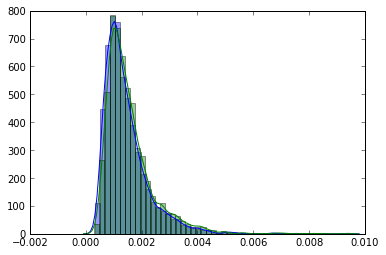

In [48]:
sns.distplot(decay_tau_bef, bins=50)
sns.distplot(decay_tau_aft, bins=50)

In [57]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

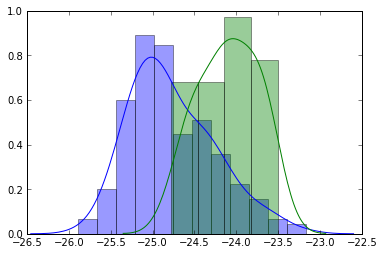

In [43]:
sns.distplot(log_amp_bef)
sns.distplot(np.log(decay_tau_stim_bef))

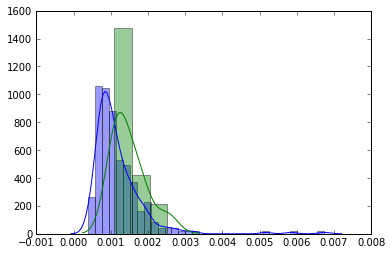

In [11]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(decay_tau_stim_bef)

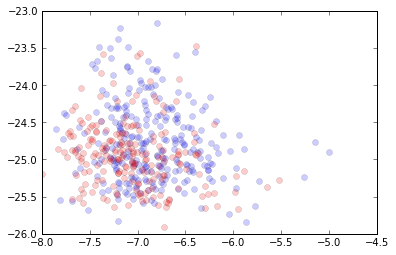

In [12]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

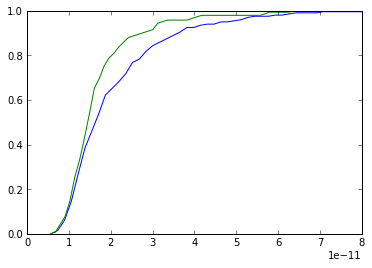

In [48]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

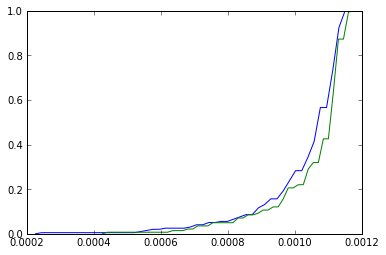

In [49]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['onset_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['onset_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)